In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load Data

In [2]:
df = pd.read_csv("results_25022020.csv").iloc[:,1:].drop_duplicates()

In [3]:
df.shape

(432, 13)

In [4]:
df.head()

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,links_response,website,label
0,CV.ASIATRIPINDONESIA,10.000000,1.0,1.0,1.0,1.0,1.0,1.0,100.000000,100.0,{'https://asiatrip.id/gallery/': '<Response [2...,http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,90.000000,1.0,1.0,1.0,1.0,1.0,1.0,100.000000,100.0,{'https://www.blooming-lotus-yoga.com/cdn-cgi/...,https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,11.111111,1.0,1.0,1.0,1.0,1.0,1.0,100.000000,100.0,"{'': 'No Response/Timeout', 'https://greenseja...",https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,12.500000,1.0,0.0,0.0,1.0,1.0,0.0,33.333333,50.0,"{'': 'No Response/Timeout', 'https://www.matai...",http://www.matair.co.id,APPROVED
4,SimplyMii,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,100.000000,0.0,{'https://www.simplymii.com/blog': '<Response ...,https://www.simplymii.com/,APPROVED


In [5]:
df.groupby("label").size()

label
APPROVED    300
REJECTED     25
REVIEWED    107
dtype: int64

### Check Distribution

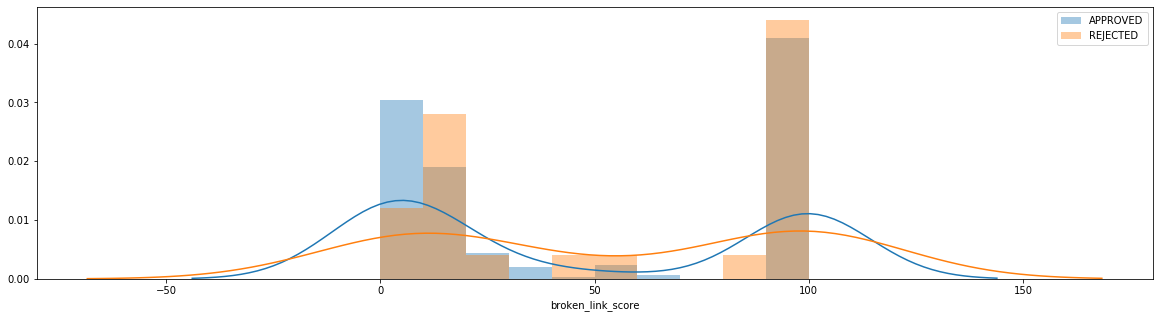

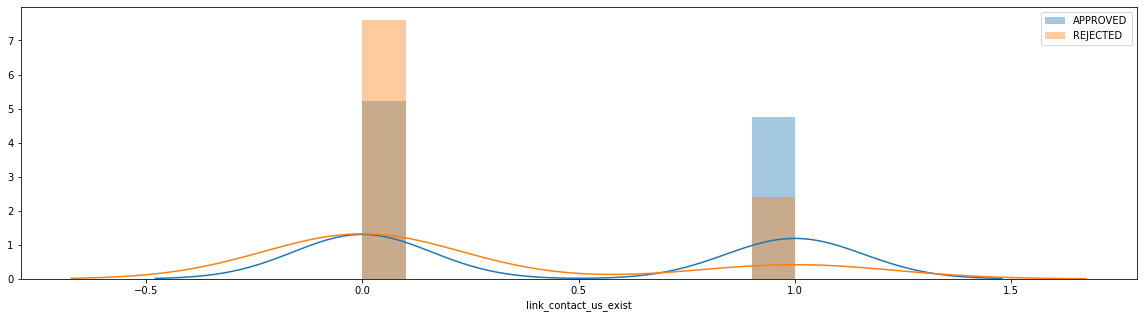

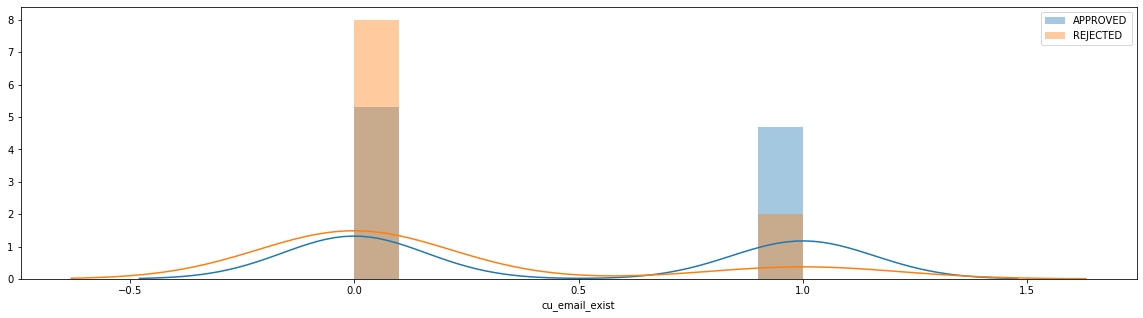

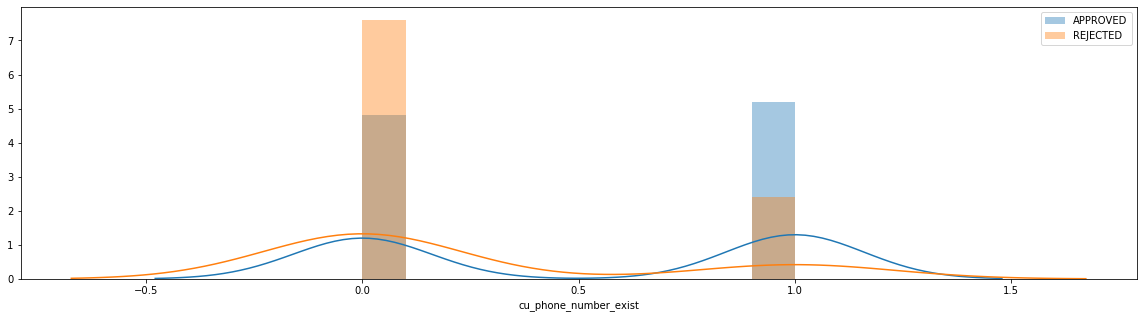

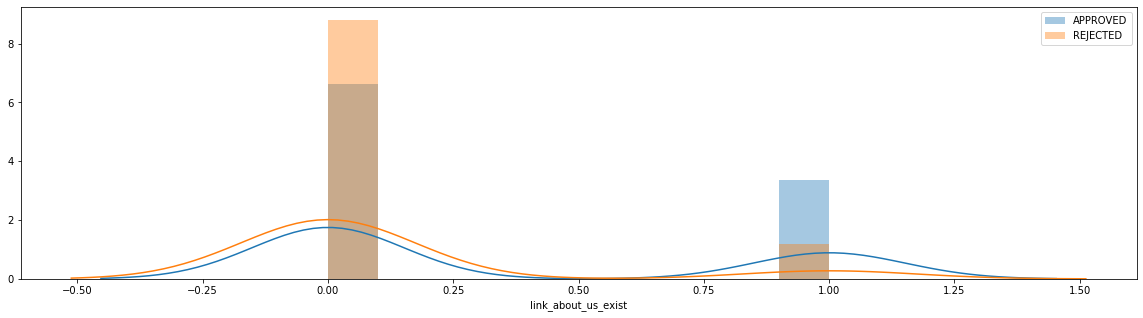

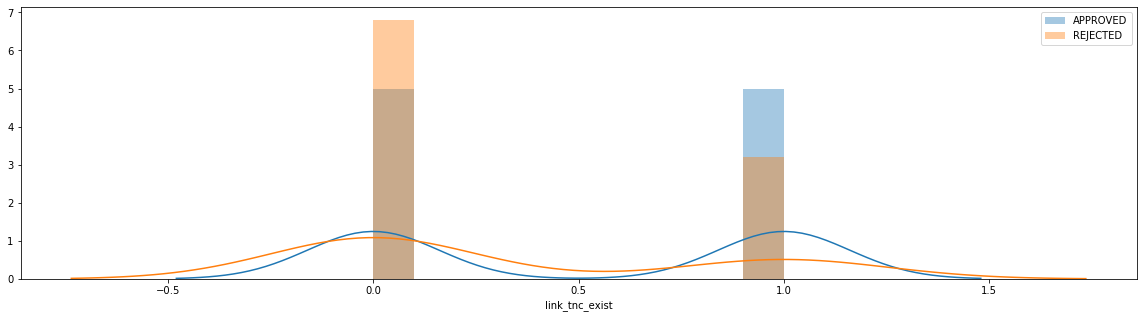

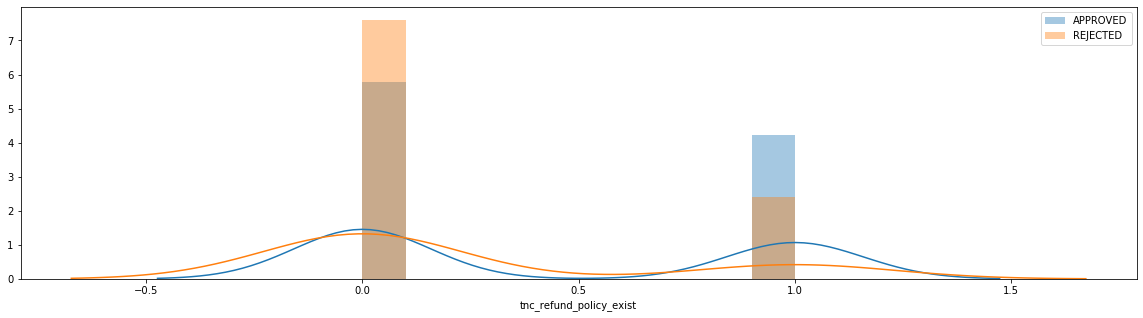

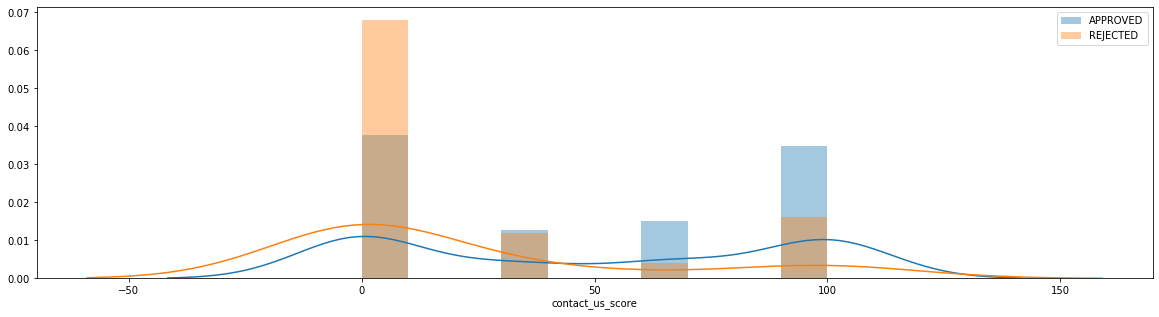

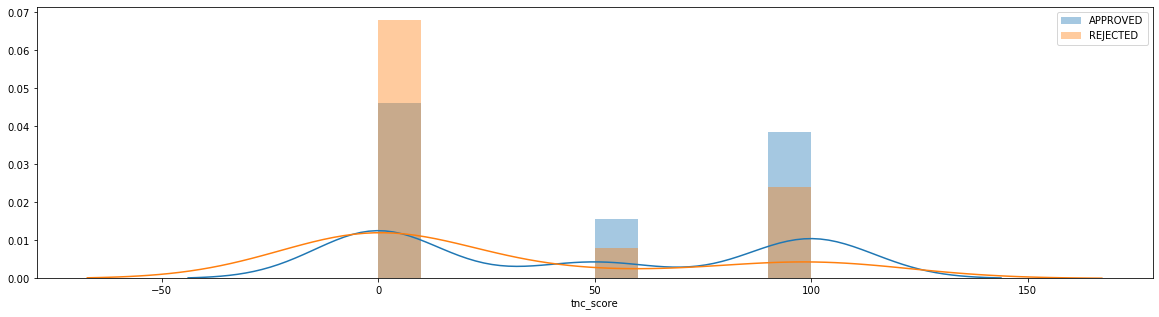

In [13]:
for column in df:
    if not (column == 'merchant_name' or column == 'label' \
            or column == 'website' or column == 'links_response'):
        plt.figure(figsize=(20,5))
        sns.distplot(df[df.label == 'APPROVED'][column], bins=10, label = 'APPROVED')
        sns.distplot(df[df.label == 'REJECTED'][column], bins=10, label = 'REJECTED')
#         sns.distplot(df[df.label == 'REVIEWED'][column], bins=10, label = 'REVIEWED')
        plt.legend()
        plt.show()

### Clean Data

In [16]:
df[(df.label == 'APPROVED') & (df.broken_link_score == 100) \
   & (df.contact_us_score == 0) & (df.tnc_score == 0)]

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,links_response,website,label
32,HuaningIndonesiaSukses,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,https://www.jomooz.com,APPROVED
57,LUBRICANTS,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,http://payment.server-development.net,APPROVED
62,BayyinahQuranIndonesia,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,bayyinah.id,APPROVED
65,Aromanis,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,https://blanjamandiri.com,APPROVED
66,CV.Mantap,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,http://mantap.com,APPROVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Valettashop,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,http://www.valettashop.com,APPROVED
328,CV.DeNatureIndonesia,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,https://www.denature.biz.id,APPROVED
329,SportHelmetOnlineStore,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,https://sporthelmet.site/,APPROVED
330,indovies.com,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No hyperlinks gathered,http://www.indovies.com,APPROVED


In [17]:
to_be_removed = df[(df.label == 'APPROVED') & (df.broken_link_score == 100) \
   & (df.contact_us_score == 0) & (df.tnc_score == 0)]

In [21]:
df_cleaned = df[~df.index.isin(to_be_removed.index)]

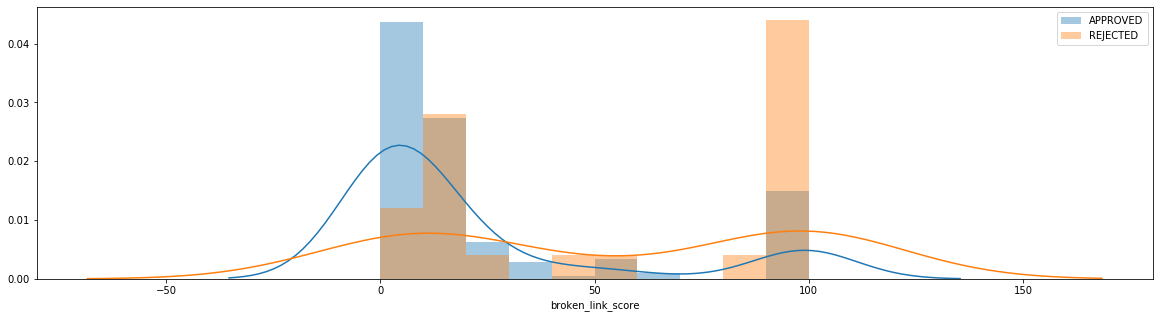

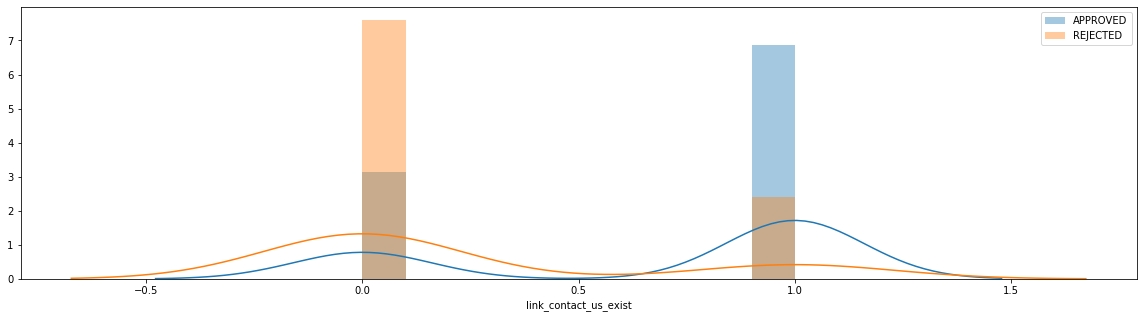

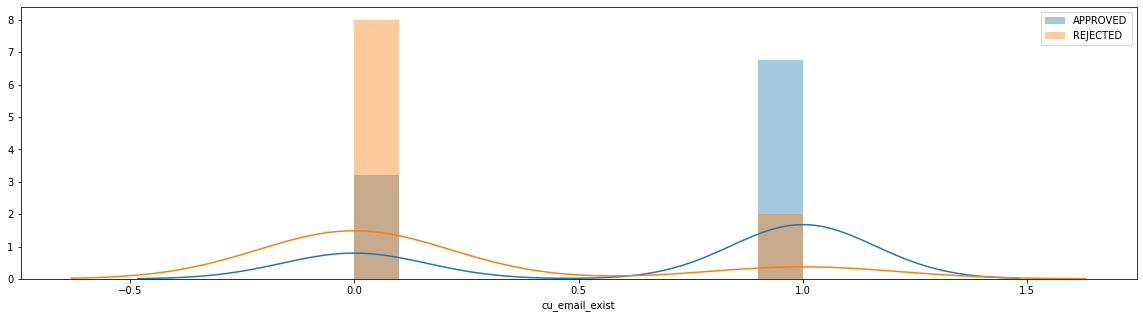

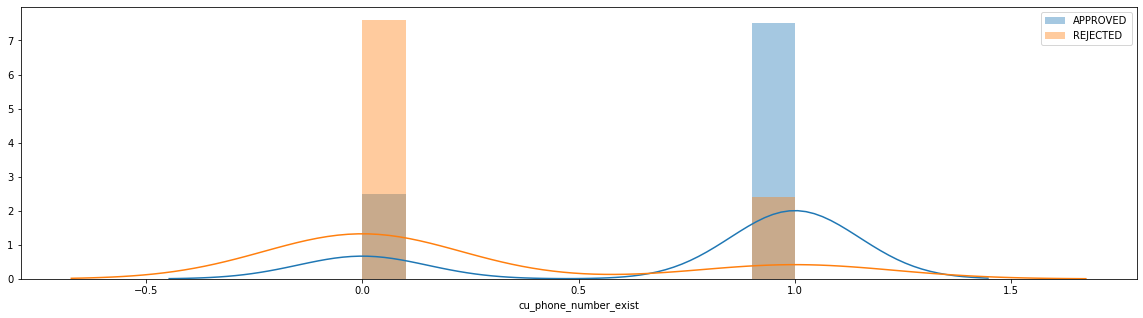

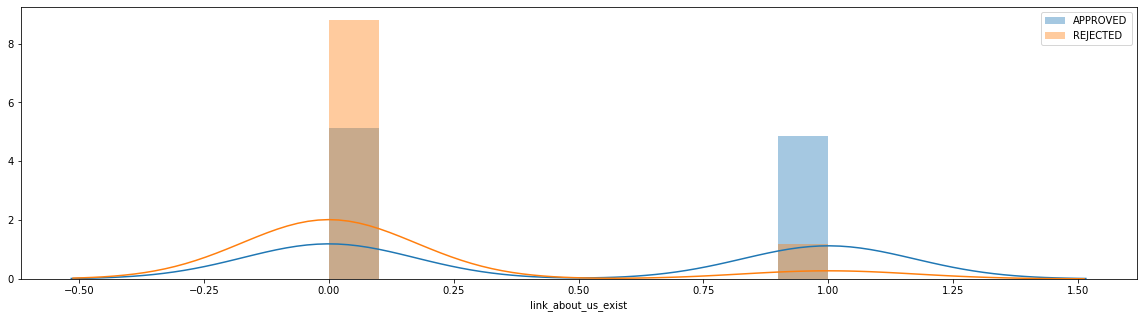

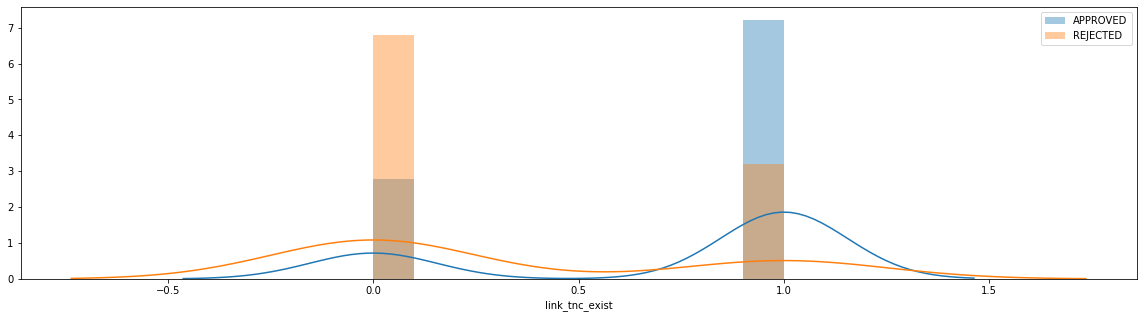

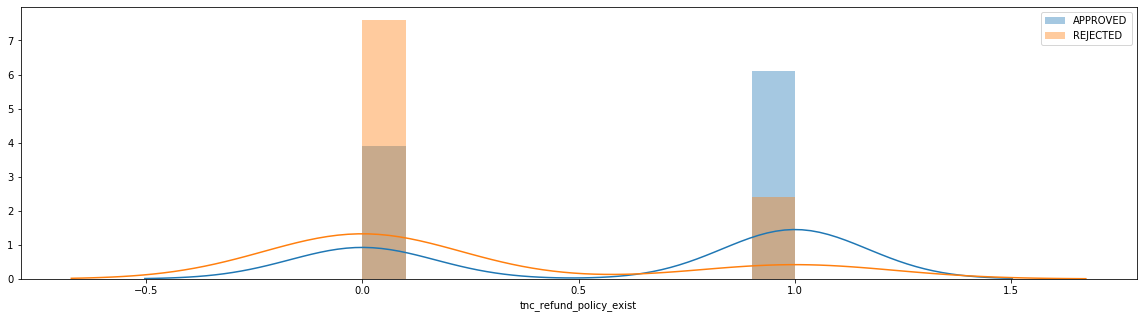

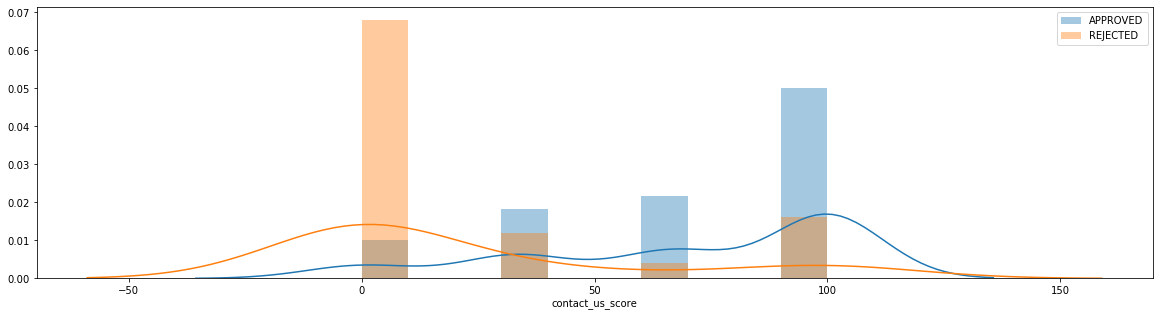

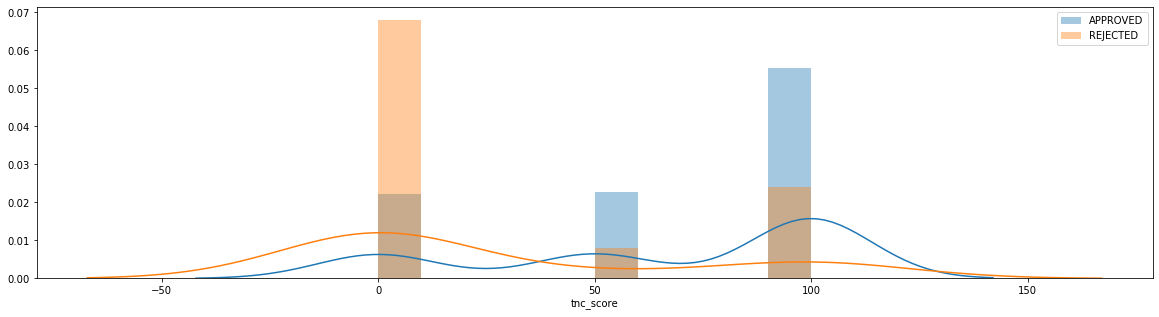

In [22]:
for column in df_cleaned:
    if not (column == 'merchant_name' or column == 'label' \
            or column == 'website' or column == 'links_response'):
        plt.figure(figsize=(20,5))
        sns.distplot(df_cleaned[df_cleaned.label == 'APPROVED'][column], bins=10, label = 'APPROVED')
        sns.distplot(df_cleaned[df_cleaned.label == 'REJECTED'][column], bins=10, label = 'REJECTED')
#         sns.distplot(df_cleaned[df_cleaned.label == 'REVIEWED'][column], bins=10, label = 'REVIEWED')
        plt.legend()
        plt.show()

In [24]:
df_cleaned.groupby("label").size()

label
APPROVED    208
REJECTED     25
REVIEWED    107
dtype: int64

In [25]:
### Export For Modelling
df_cleaned[df_cleaned.label.isin(['APPROVED', 'REJECTED'])].to_csv("df_cleaned.csv")